 
 ## Problem statement: Question 1: Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

## Strategy: There are many different categories of housing problems, one can focus on the category which has maximum complaints. This will help managment to better manage the resources. 



 ## Prepare libraries


In [2]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /Applications/anaconda/lib/python3.5/site-packages (19.1.1)


In [4]:
!pip install missingno

In [5]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from IPython.display import display
%matplotlib inline

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

In [6]:
df = pd.read_csv('./data/NYCdata.csv')         


In [7]:
# get the idea of dataframe's number of rows and columns
df.shape

(5732292, 15)

In [8]:
df.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,NaN,Unspecified,NaN,2013-01-11T15:01:56.000,HPD Literature Request,2013-01-11T13:25:34.000,NaN,nan,nan,NaN,nan,"The literature has been mailed. If it has not been received, please request it again from 311.",Closed,NaN,24765056
1,ADDRESS,QUEENS,Queens Village,2019-03-30T08:58:02.000,PAINT/PLASTER,2018-08-11T19:19:41.000,104-34 219 STREET,"11,429.000",40.712,RESIDENTIAL BUILDING,-73.736,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,Closed,219 STREET,39981834
2,ADDRESS,QUEENS,Queens Village,2019-03-30T08:58:01.000,APPLIANCE,2018-08-11T19:19:41.000,104-34 219 STREET,"11,429.000",40.712,RESIDENTIAL BUILDING,-73.736,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,Closed,219 STREET,39982698
3,ADDRESS,QUEENS,Queens Village,2019-03-30T08:58:01.000,UNSANITARY CONDITION,2018-08-11T19:19:41.000,104-34 219 STREET,"11,429.000",40.712,RESIDENTIAL BUILDING,-73.736,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.,Closed,219 STREET,39987943
4,ADDRESS,QUEENS,Saint Albans,2019-03-30T08:58:02.000,DOOR/WINDOW,2018-10-23T19:27:06.000,116-35 195 STREET,"11,412.000",40.694,RESIDENTIAL BUILDING,-73.757,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,Closed,195 STREET,40636028


In [9]:
# Start analysing the data

# in the following line of code we can see columns name in the dataset
df.columns
# Its always good to know the datatype in order to apply correct method on them
df.dtypes



address_type               object
borough                    object
city                       object
closed_date                object
complaint_type             object
created_date               object
incident_address           object
incident_zip              float64
latitude                  float64
location_type              object
longitude                 float64
resolution_description     object
status                     object
street_name                object
unique_key                  int64
dtype: object

In [10]:
# Choose the relevant column and apply method value_counts to count the number of appearences of same values
complaint_type = df['complaint_type'].value_counts()
complaint_type = complaint_type.sort_values(ascending=True)
#See the output of your code snippets above. Reversing array would be good idea as maximum number of complaint should appear first for asthetic 
#and logical reasons 
complaint_type[::-1]

HEAT/HOT WATER            1130327
HEATING                    887869
PLUMBING                   689776
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       412845
PAINT - PLASTER            361258
PAINT/PLASTER              328209
ELECTRIC                   296711
NONCONST                   260890
DOOR/WINDOW                191240
WATER LEAK                 178419
GENERAL                    139492
FLOORING/STAIRS            129930
APPLIANCE                  105757
HPD Literature Request      53563
SAFETY                      47262
OUTSIDE BUILDING             6804
ELEVATOR                     5966
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

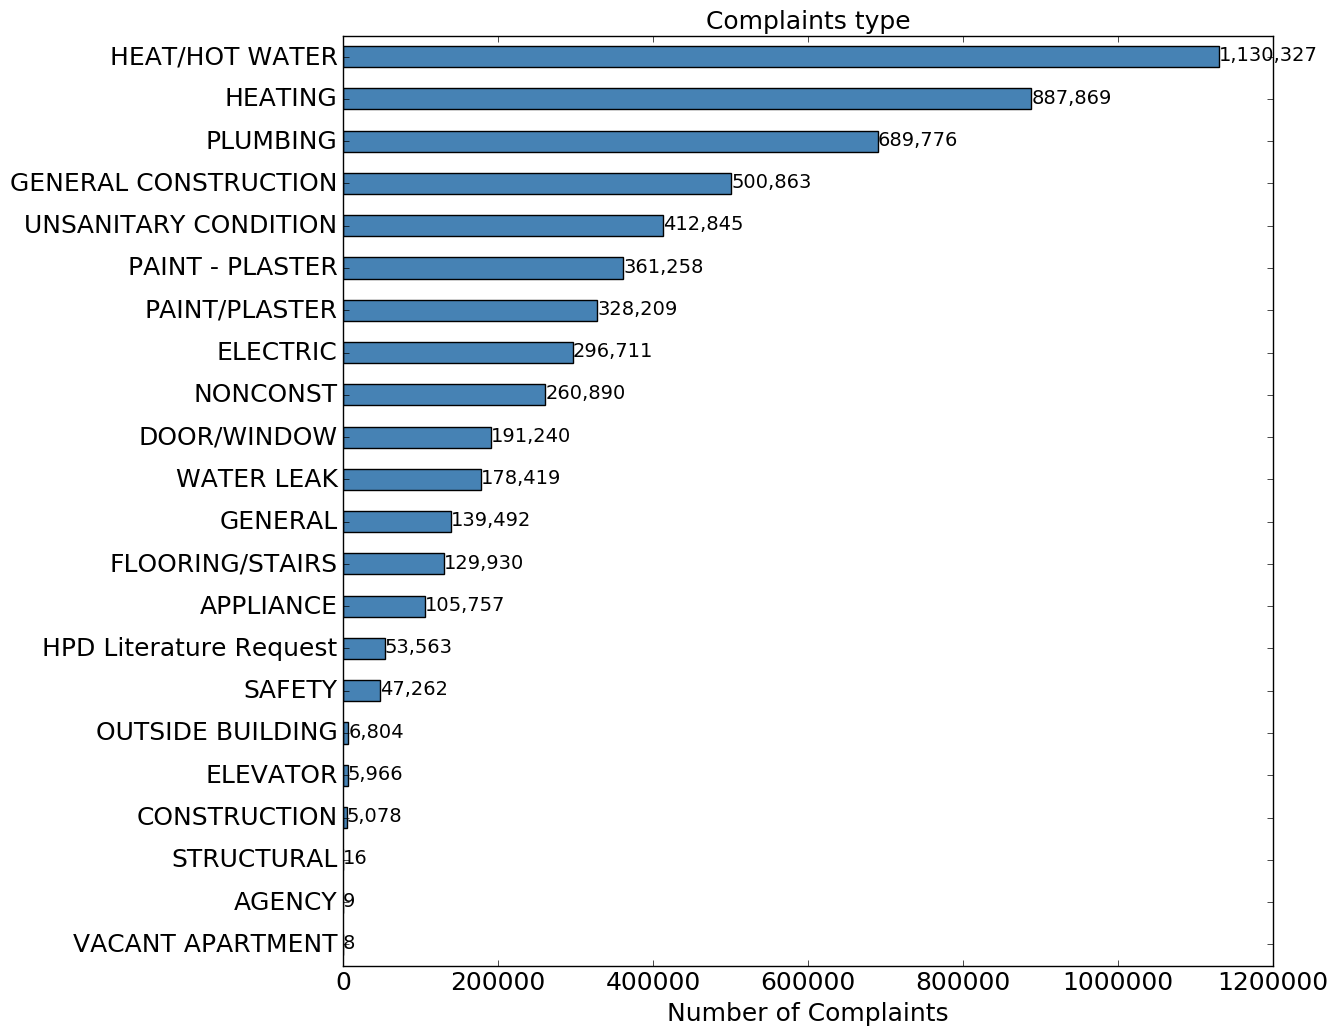

In [11]:
# we can visulize the complaints type and number of complainted in horizontal plot
complaint_type.plot(kind='barh', figsize=(12, 12), color='steelblue',fontsize=18)
plt.xlabel('Number of Complaints',fontsize=18)
plt.title('Complaints type', fontsize=18)

# annotate value labels to each country
for index, value in enumerate(complaint_type): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value, index-0.1 ), color='black', fontsize=14)

plt.show()

 ## After reading the New york city data file, one can see that HEAT/HOT WATER complaint column has been merged with HEATING after 2014. Lets merge them together 


In [12]:
df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])

In [13]:
df['complaint_type'].value_counts()

HEAT/HOT WATER            2018196
PLUMBING                   689776
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       412845
PAINT - PLASTER            361258
PAINT/PLASTER              328209
ELECTRIC                   296711
NONCONST                   260890
DOOR/WINDOW                191240
WATER LEAK                 178419
GENERAL                    139492
FLOORING/STAIRS            129930
APPLIANCE                  105757
HPD Literature Request      53563
SAFETY                      47262
OUTSIDE BUILDING             6804
ELEVATOR                     5966
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

In [14]:
from datetime import datetime
df['created_date'] = pd.to_datetime(df['created_date'], format = '%Y%m%dT%H:%M:%S.%f')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732292 entries, 0 to 5732291
Data columns (total 15 columns):
address_type              object
borough                   object
city                      object
closed_date               object
complaint_type            object
created_date              datetime64[ns]
incident_address          object
incident_zip              float64
latitude                  float64
location_type             object
longitude                 float64
resolution_description    object
status                    object
street_name               object
unique_key                int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 656.0+ MB


 ## one can observe HEATING complaint type being merged with HEAT/HOT WATER complaint type and 'created_date' format is datetime


In [15]:

df['created_year'] = df['created_date'].map(lambda x: x.strftime('%Y')).astype(int)

In [16]:
df['created_month'] = df['created_date'].map(lambda x: x.strftime('%m')).astype(int)

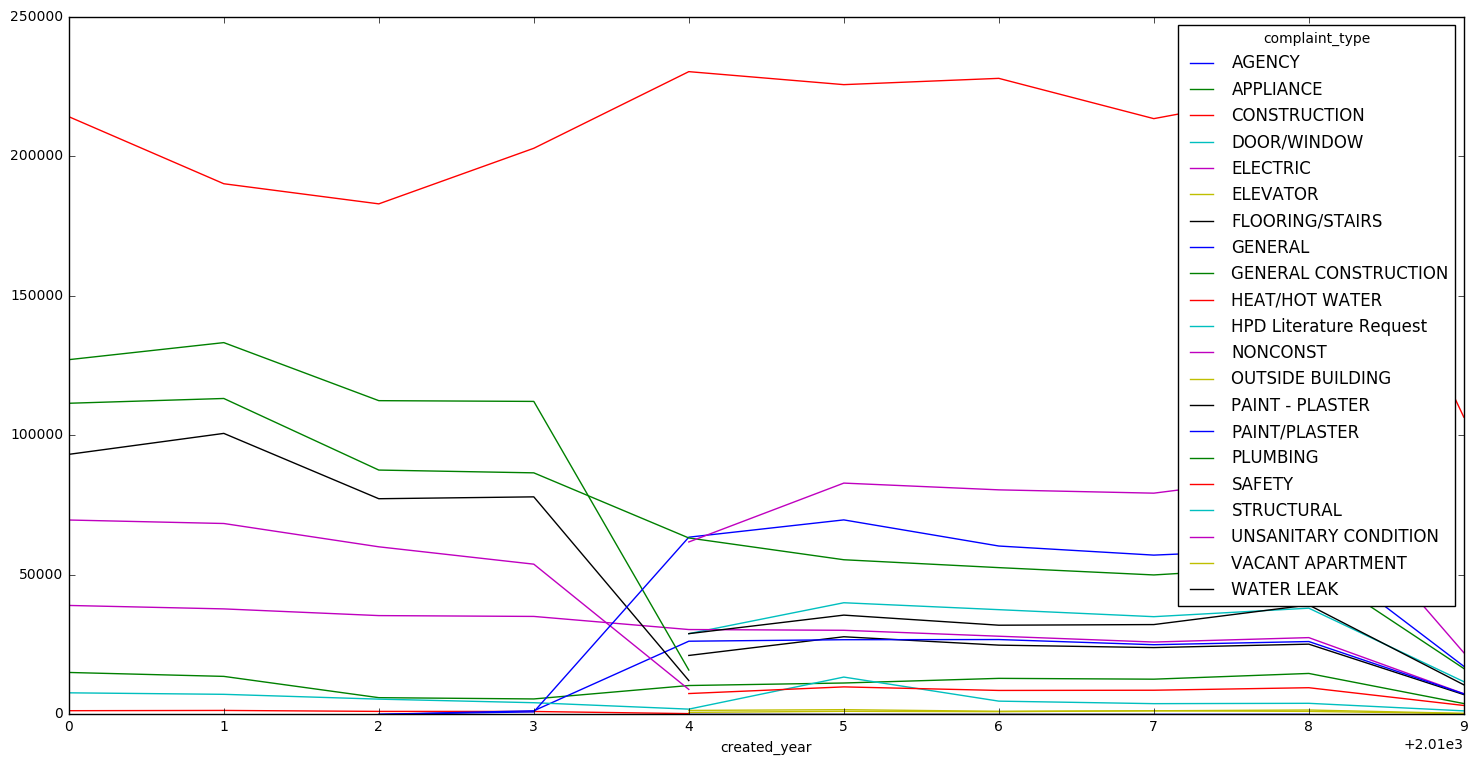

In [17]:
fig, ax = plt.subplots(figsize=(18,9))
df.groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot(ax=ax)

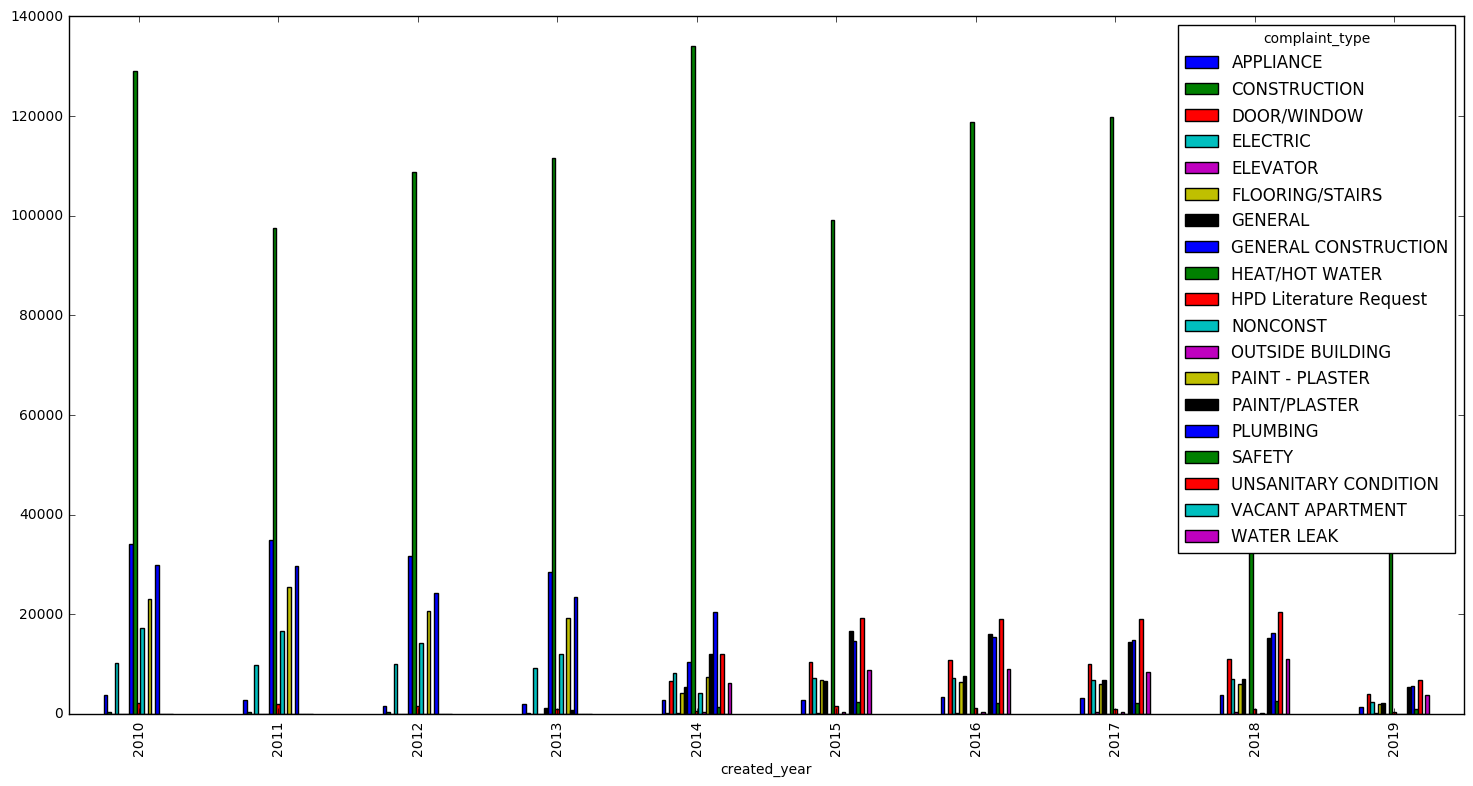

In [18]:
fig, ax = plt.subplots(figsize=(18,9))
df[df['created_month'].isin([11, 12,1])].groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot.bar(ax=ax)



 ##   <font color=blue> Looking at the above bar plot, it is clear the Heating complaints is heighest. Here we have specifically focussed on the winter season.



 ## <font color=red> Concluding remarks: Solution of problem 1: Based on the above plot it is clear that maximum number of complaints are coming fromHEAT/HOT water category. So HPD should address the **HEAT/HOT WATER** complaint first. The problem remails all time high. It is clear with the time dependent plots.
